In [2]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import pytz
import time
import matplotlib.pyplot as plt

# --------------------------------
# KMA API SETTINGS
# --------------------------------
API_KEY = "YnURiJMqTmm1EYiTKt5pNw"   # ← your authKey
LAT = 37.57141
LON = 126.96579
KST = pytz.timezone("Asia/Seoul")


# --------------------------------
# GET VALID KST TIME
# --------------------------------
def kst(minutes_ago=0):
    t = datetime.now(KST) - timedelta(minutes=minutes_ago)
    return t.strftime("%Y%m%d%H%M")


# --------------------------------
# PARSE FLOAT SAFELY
# --------------------------------
def parse_value(text):
    try:
        lines = text.strip().split("\n")
        for line in lines:
            try:
                return float(line.strip())
            except:
                pass
    except:
        pass
    return None


# --------------------------------
# FETCH 1 VARIABLE WITH DEBUG
# --------------------------------
def fetch_var(obs, tm):
    url = "https://apihub.kma.go.kr/api/typ01/url/sfc_nc_var.php"
    params = {
        "obs": obs,
        "lat": LAT,
        "lon": LON,
        "tm1": tm,
        "tm2": tm,
        "itv": 1,
        "authKey": API_KEY
    }

    print(f"\n📡 Fetching {obs} at {tm}")
    r = requests.get(url, params=params)

    print("Status:", r.status_code)
    print("RAW:", r.text)
    print("--------------------------------------")

    if r.status_code != 200:
        return None

    return parse_value(r.text)


# --------------------------------
# RISK EQUATIONS
# --------------------------------
def compute_risks(ta, hm, td, ws, ps, rain60, rainday):
    flood = 0.5 * hm + 0.4 * rain60 + 0.6 * rainday
    fire = 0.7 * (100 - hm) + 0.3 * ws
    moisture = 0.5 * hm + 0.3 * ta + 0.2 * td
    return flood, fire, moisture


# --------------------------------
# COLLECT DATA FOR N TIME POINTS
# --------------------------------
def collect_data(n_samples=10):
    rows = []

    for i in range(n_samples):
        tm = kst(i * 10)
        print("\n==============================")
        print("   Time:", tm)
        print("==============================")

        obs_list = {
            "ta": "Temperature",
            "hm": "Humidity",
            "td": "DewPoint",
            "ws_10m": "Wind10m",
            "ps": "Pressure",
            "rn_60m": "Rain60m",
            "rn_day": "RainDay"
        }

        vals = {}
        missing = False

        for obs, label in obs_list.items():
            v = fetch_var(obs, tm)
            vals[obs] = v
            print(f"{label}: {v}")
            if v is None:
                missing = True
            time.sleep(0.3)

        if missing:
            print("❌ Missing data → Skipped")
            continue

        flood, fire, moisture = compute_risks(
            vals["ta"], vals["hm"], vals["td"], vals["ws_10m"],
            vals["ps"], vals["rn_60m"], vals["rn_day"]
        )

        rows.append({
            "time": tm,
            "flood_risk": flood,
            "fire_risk": fire,
            "moisture_risk": moisture
        })

    return pd.DataFrame(rows)


# --------------------------------
# RUN
# --------------------------------
df = collect_data(10)

print("\nFINAL DATA:")
print(df)

# Save CSV
df.to_csv("risk_dataset.csv", index=False)
print("\n💾 Saved → risk_dataset.csv")

# --------------------------------
# PLOT RESULTS
# --------------------------------
if not df.empty:
    plt.figure(figsize=(12, 6))

    plt.plot(df["time"], df["flood_risk"], label="Flood Risk")
    plt.plot(df["time"], df["fire_risk"], label="Fire Risk")
    plt.plot(df["time"], df["moisture_risk"], label="Moisture Risk")

    plt.xlabel("Time")
    plt.ylabel("Risk Level")
    plt.title("Flood, Fire, and Moisture Risks Over Time")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("⚠ No data collected → cannot plot.")



   Time: 202511171033

📡 Fetching ta at 202511171033
Status: 403
RAW: {
  "result" : {
    "status" : 403,
    "message" : "활용신청이 필요한 API 입니다. 활용신청 후 다시 시도해 주십시오."
  }
}
--------------------------------------
Temperature: None

📡 Fetching hm at 202511171033
Status: 403
RAW: {
  "result" : {
    "status" : 403,
    "message" : "활용신청이 필요한 API 입니다. 활용신청 후 다시 시도해 주십시오."
  }
}
--------------------------------------
Humidity: None

📡 Fetching td at 202511171033
Status: 403
RAW: {
  "result" : {
    "status" : 403,
    "message" : "활용신청이 필요한 API 입니다. 활용신청 후 다시 시도해 주십시오."
  }
}
--------------------------------------
DewPoint: None

📡 Fetching ws_10m at 202511171033
Status: 403
RAW: {
  "result" : {
    "status" : 403,
    "message" : "활용신청이 필요한 API 입니다. 활용신청 후 다시 시도해 주십시오."
  }
}
--------------------------------------
Wind10m: None

📡 Fetching ps at 202511171033
Status: 403
RAW: {
  "result" : {
    "status" : 403,
    "message" : "활용신청이 필요한 API 입니다. 활용신청 후 다시 시도해 주십시오."
  }
}
---------------

In [4]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import pytz
import time
import matplotlib.pyplot as plt

# --------------------------------
# KMA API SETTINGS
# --------------------------------
API_KEY = "YnURiJMqTmm1EYiTKt5pNw"   # ← your authKey
LAT = 37.57141
LON = 126.96579
KST = pytz.timezone("Asia/Seoul")


# --------------------------------
# GET VALID KST TIME
# --------------------------------
def kst(minutes_ago=0):
    t = datetime.now(KST) - timedelta(minutes=minutes_ago)
    return t.strftime("%Y%m%d%H%M")


# --------------------------------
# PARSE FLOAT SAFELY
# --------------------------------
def parse_value(text):
    try:
        lines = text.strip().split("\n")
        for line in lines:
            try:
                return float(line.strip())
            except:
                pass
    except:
        pass
    return None


# --------------------------------
# FETCH 1 VARIABLE WITH DEBUG
# --------------------------------
def fetch_var(obs, tm):
    url = "https://apihub.kma.go.kr/api/typ01/url/sfc_nc_var.php"
    params = {
        "obs": obs,
        "lat": LAT,
        "lon": LON,
        "tm1": tm,
        "tm2": tm,
        "itv": 1,
        "authKey": API_KEY
    }

    print(f"\n📡 Fetching {obs} at {tm}")
    r = requests.get(url, params=params)

    print("Status:", r.status_code)
    print("RAW:", r.text)
    print("--------------------------------------")

    if r.status_code != 200:
        return None

    return parse_value(r.text)


# --------------------------------
# RISK EQUATIONS
# --------------------------------
def compute_risks(ta, hm, td, ws, ps, rain60, rainday):
    flood = 0.5 * hm + 0.4 * rain60 + 0.6 * rainday
    fire = 0.7 * (100 - hm) + 0.3 * ws
    moisture = 0.5 * hm + 0.3 * ta + 0.2 * td
    return flood, fire, moisture


# --------------------------------
# COLLECT DATA FOR N TIME POINTS
# --------------------------------
def collect_data(n_samples=10):
    rows = []

    for i in range(n_samples):
        tm = kst(i * 10)
        print("\n==============================")
        print("   Time:", tm)
        print("==============================")

        obs_list = {
            "ta": "Temperature",
            "hm": "Humidity",
            "td": "DewPoint",
            "ws_10m": "Wind10m",
            "ps": "Pressure",
            "rn_60m": "Rain60m",
            "rn_day": "RainDay"
        }

        vals = {}
        missing = False

        for obs, label in obs_list.items():
            v = fetch_var(obs, tm)
            vals[obs] = v
            print(f"{label}: {v}")
            if v is None:
                missing = True
            time.sleep(0.3)

        if missing:
            print("❌ Missing data → Skipped")
            continue

        flood, fire, moisture = compute_risks(
            vals["ta"], vals["hm"], vals["td"], vals["ws_10m"],
            vals["ps"], vals["rn_60m"], vals["rn_day"]
        )

        rows.append({
            "time": tm,
            "flood_risk": flood,
            "fire_risk": fire,
            "moisture_risk": moisture
        })

    return pd.DataFrame(rows)


# --------------------------------
# RUN
# --------------------------------
df = collect_data(10)

print("\nFINAL DATA:")
print(df)

# Save CSV
df.to_csv("risk_dataset.csv", index=False)
print("\n💾 Saved → risk_dataset.csv")

# --------------------------------
# PLOT RESULTS
# --------------------------------
if not df.empty:
    plt.figure(figsize=(12, 6))

    plt.plot(df["time"], df["flood_risk"], label="Flood Risk")
    plt.plot(df["time"], df["fire_risk"], label="Fire Risk")
    plt.plot(df["time"], df["moisture_risk"], label="Moisture Risk")

    plt.xlabel("Time")
    plt.ylabel("Risk Level")
    plt.title("Flood, Fire, and Moisture Risks Over Time")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("⚠ No data collected → cannot plot.")




   Time: 202511180050

📡 Fetching ta at 202511180050
Status: 403
RAW: {
  "result" : {
    "status" : 403,
    "message" : "활용신청이 필요한 API 입니다. 활용신청 후 다시 시도해 주십시오."
  }
}
--------------------------------------
Temperature: None

📡 Fetching hm at 202511180050
Status: 403
RAW: {
  "result" : {
    "status" : 403,
    "message" : "활용신청이 필요한 API 입니다. 활용신청 후 다시 시도해 주십시오."
  }
}
--------------------------------------
Humidity: None

📡 Fetching td at 202511180050
Status: 403
RAW: {
  "result" : {
    "status" : 403,
    "message" : "활용신청이 필요한 API 입니다. 활용신청 후 다시 시도해 주십시오."
  }
}
--------------------------------------
DewPoint: None

📡 Fetching ws_10m at 202511180050
Status: 403
RAW: {
  "result" : {
    "status" : 403,
    "message" : "활용신청이 필요한 API 입니다. 활용신청 후 다시 시도해 주십시오."
  }
}
--------------------------------------
Wind10m: None

📡 Fetching ps at 202511180050
Status: 403
RAW: {
  "result" : {
    "status" : 403,
    "message" : "활용신청이 필요한 API 입니다. 활용신청 후 다시 시도해 주십시오."
  }
}
---------------


Correlation matrix:
                  temperature  traffic_volume  electricity_kwh  traffic_co2  \
temperature         1.000000        0.005145        -0.267616     0.005145   
traffic_volume      0.005145        1.000000         0.244030     1.000000   
electricity_kwh    -0.267616        0.244030         1.000000     0.244030   
traffic_co2         0.005145        1.000000         0.244030     1.000000   
electricity_co2    -0.267616        0.244030         1.000000     0.244030   
total_co2          -0.159286        0.807767         0.768799     0.807767   

                 electricity_co2  total_co2  
temperature            -0.267616  -0.159286  
traffic_volume          0.244030   0.807767  
electricity_kwh         1.000000   0.768799  
traffic_co2             0.244030   0.807767  
electricity_co2         1.000000   0.768799  
total_co2               0.768799   1.000000  


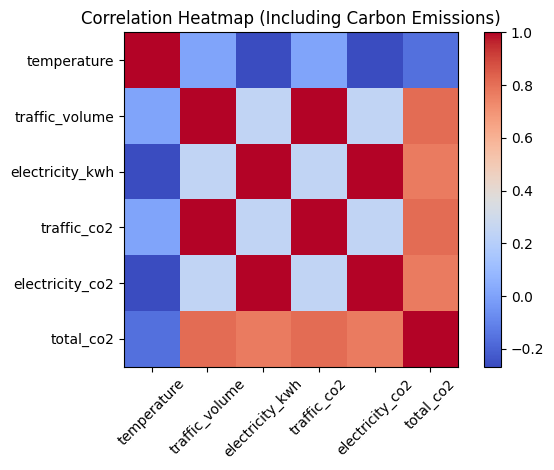

In [10]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import requests

# ==========================
# 1. WEATHER API REQUEST
# ==========================

api_url = "https://apihub.kma.go.kr/api/typ01/cgi-bin/url/nph-sfc_obs_nc_pt_api"
params = {
    "obs": "ta",
    "tm1": "202306110000",
    "tm2": "202306110300",
    "itv": 10,
    "lon": 126.5329,
    "lat": 33.361,
    "authKey": "3ysqUXuHRcerKlF7h9XHOA"
}

response = requests.get(api_url, params=params)

if response.status_code == 200:
    data = response.text
    df_weather = pd.read_csv(
        io.StringIO(data),
        skiprows=1,
        names=["timestamp", "obs", "lon", "lat", "temperature", "extra"]
    )
    df_weather["timestamp"] = pd.to_datetime(df_weather["timestamp"], format="%Y%m%d%H%M")
    df_weather = df_weather[["timestamp", "temperature"]]
else:
    raise Exception(f"API request failed with status {response.status_code}")


# ==========================
# 2. SIMULATED TRAFFIC & ELECTRICITY DATA
# ==========================

timestamps = df_weather["timestamp"]
traffic_volume = np.random.randint(800, 1600, size=len(timestamps))   # number of cars
electricity_kwh = np.random.randint(200, 600, size=len(timestamps))   # kWh consumed

df_inputs = pd.DataFrame({
    "timestamp": timestamps,
    "traffic_volume": traffic_volume,
    "electricity_kwh": electricity_kwh
})


# ==========================
# 3. REAL CARBON EMISSIONS MODEL
# ==========================

# Traffic CO₂ emission factor (kg CO2 per car km)
TRAFFIC_EF = 0.251     # Based on EPA

# Electricity carbon intensity (kg CO2 per kWh)
ELEC_EF = 0.47         # Korea average 2023

df_inputs["traffic_co2"] = df_inputs["traffic_volume"] * TRAFFIC_EF
df_inputs["electricity_co2"] = df_inputs["electricity_kwh"] * ELEC_EF

# Total CO₂
df_inputs["total_co2"] = df_inputs["traffic_co2"] + df_inputs["electricity_co2"]


# ==========================
# 4. MERGE WEATHER + CO₂ DATA
# ==========================

df_merged = pd.merge(df_weather, df_inputs, on="timestamp", how="inner")


# ==========================
# 5. CORRELATION
# ==========================

corr_matrix = df_merged[[
    "temperature",
    "traffic_volume",
    "electricity_kwh",
    "traffic_co2",
    "electricity_co2",
    "total_co2"
]].corr()

print("\nCorrelation matrix:\n", corr_matrix)


# ==========================
# 6. HEATMAP
# ==========================

plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Heatmap (Including Carbon Emissions)")
plt.tight_layout()
plt.show()

In [9]:
\
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import requests

# ==========================
# 1. WEATHER API REQUEST
# ==========================

api_url = "https://climate.go.kr/atlas/am/am/co2"
params = {
    "obs": "ta",
    "tm1": "202306110000",
    "tm2": "202306110300",
    "itv": 10,
    "lon": 126.5329,
    "lat": 33.361,
    "authKey": "3ysqUXuHRcerKlF7h9XHOA"
}

response = requests.get(api_url, params=params)

if response.status_code == 200:
    data = response.text
    df_weather = pd.read_csv(
        io.StringIO(data),
        skiprows=1,
        names=["timestamp", "obs", "lon", "lat", "temperature", "extra"]
    )
    df_weather["timestamp"] = pd.to_datetime(df_weather["timestamp"], format="%Y%m%d%H%M")
    df_weather = df_weather[["timestamp", "temperature"]]
else:
    raise Exception(f"API request failed with status {response.status_code}")


# ==========================
# 2. SIMULATED TRAFFIC & ELECTRICITY DATA
# ==========================

timestamps = df_weather["timestamp"]
traffic_volume = np.random.randint(800, 1600, size=len(timestamps))   # number of cars
electricity_kwh = np.random.randint(200, 600, size=len(timestamps))   # kWh consumed

df_inputs = pd.DataFrame({
    "timestamp": timestamps,
    "traffic_volume": traffic_volume,
    "electricity_kwh": electricity_kwh
})


# ==========================
# 3. REAL CARBON EMISSIONS MODEL
# ==========================

# Traffic CO₂ emission factor (kg CO2 per car km)
TRAFFIC_EF = 0.251     # Based on EPA

# Electricity carbon intensity (kg CO2 per kWh)
ELEC_EF = 0.47         # Korea average 2023

df_inputs["traffic_co2"] = df_inputs["traffic_volume"] * TRAFFIC_EF
df_inputs["electricity_co2"] = df_inputs["electricity_kwh"] * ELEC_EF

# Total CO₂
df_inputs["total_co2"] = df_inputs["traffic_co2"] + df_inputs["electricity_co2"]


# ==========================
# 4. MERGE WEATHER + CO₂ DATA
# ==========================

df_merged = pd.merge(df_weather, df_inputs, on="timestamp", how="inner")


# ==========================
# 5. CORRELATION
# ==========================

corr_matrix = df_merged[[
    "temperature",
    "traffic_volume",
    "electricity_kwh",
    "traffic_co2",
    "electricity_co2",
    "total_co2"
]].corr()

print("\nCorrelation matrix:\n", corr_matrix)


# ==========================
# 6. HEATMAP
# ==========================

plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Heatmap (Including Carbon Emissions)")
plt.tight_layout()
plt.show()

Exception: API request failed with status 405

In [17]:
import json

filename = "response.json"

# Fayl bo‘sh-bo‘sh emasmi, avval tekshirib ko‘ramiz
with open(filename, "r", encoding="utf-8") as f:
    content = f.read()

if not content.strip():
    print("Fayl bo'sh 👀")
else:
    data = json.loads(content)   # yoki json.load(f) ni ishlatish mumkin edi
    print(data)



Fayl bo'sh 👀
